In [1542]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root
from scipy.misc import derivative

import sys 
import os
sys.path.append(os.path.abspath("D:\\VScodeProjects\\numerical-methods\\pythonDependencies"))
from format import *      # type: ignore
from formatLatex import * # type: ignore

In [1543]:
def std_cout(data, info, PRECISION): 
    for dataElement, infoElement in zip(data, info):

        dataElement = np.round(dataElement, PRECISION)

        name = infoElement['name']
        type = infoElement['type']

        match type:
            case 'matrix':
                printBig(f'Matrix {name}') # type: ignore
                printMatrix(dataElement)   # type: ignore
                latexMatrix(dataElement)   # type: ignore

            case 'cvector':
                printBig(f'Vector {name}')         # type: ignore
                printVector(dataElement)           # type: ignore
                latexVector(dataElement, 'column') # type: ignore

            case 'rvector':
                printBig(f'Vector {name}')      # type: ignore
                printVector(dataElement)        # type: ignore
                latexVector(dataElement, 'row') # type: ignore

            case _:
                printBig(f'{name}')        # type: ignore
                printBig(f'{dataElement}') # type: ignore

<div style="text-align: center; font-size: 24px;">
    <p>Задание 1.1</p>
</div>

In [1544]:
PRECISION = 3
EPSILON = 0.01

np.set_printoptions(precision=PRECISION)

N = 9
# N = 8
n = 52
BETA = 1 - 0.03 * (50 - n)

A = np.round(np.array([[ 10 * BETA, 1,          2,         3      ],
                       [-1,         10 * BETA, -3,         2      ],
                       [ 2,         3,          10 * BETA, 1      ],
                       [ 3,         2,          1,         10*BETA]]), PRECISION)
# A = np.round(np.array([[ 10 * BETA, 1,          2,         3      ],
#                        [1,         10 * BETA, 3,         2      ],
#                        [ -2,         3,          10 * BETA, 1      ],
#                        [ 3,         2,          1,         10*BETA]]), PRECISION)

x0 = np.zeros(len(A))
b  = A @ np.ones(len(A))

<div style="text-align: center; font-size: 24px;">
    <p>Initial data</p>
</div>

In [1545]:
printBig('Matrix A') # type: ignore
printMatrix(A)       # type: ignore
latexMatrix(A)       # type: ignore

10.6,1.0,2.0,3.0
-1.0,10.6,-3.0,2.0
2.0,3.0,10.6,1.0
3.0,2.0,1.0,10.6


\begin{pmatrix}
10.6 & 1.0 & 2.0 & 3.0 \\
-1.0 & 10.6 & -3.0 & 2.0 \\
2.0 & 3.0 & 10.6 & 1.0 \\
3.0 & 2.0 & 1.0 & 10.6 \\
\end{pmatrix}


In [1546]:
printBig('Vector b')      # type: ignore
printVector(b)            # type: ignore
latexVector(b, 'column')  # type: ignore

16.6
8.6
16.6
16.6


\begin{pmatrix}
16.6 \\
8.6 \\
16.6 \\
16.6 \\
\end{pmatrix}


In [1547]:
printBig('Vector x0')      # type: ignore
printVector(x0)            # type: ignore
latexVector(x0, 'column')  # type: ignore

0.0
0.0
0.0
0.0


\begin{pmatrix}
0.0 \\
0.0 \\
0.0 \\
0.0 \\
\end{pmatrix}


In [1548]:
def SimpleIterationMethod(A, b, x0, EPSILON):
    def chebushev(data):
        return np.linalg.norm(data, np.inf)

    D = np.diagflat(1 / np.diagonal(A))
    E = np.identity(len(A))
    F = E - D @ A

    norm = chebushev(F)

    g = D @ b

    theoretical_k = np.emath.logn(chebushev(F), (EPSILON * (1 - chebushev(F)))/(chebushev(g)))
    print(f'theoretical k: {theoretical_k}')

    def mainRecursion(x, k):
        # print(f'\ncurrent x: {x}')
        # print(f'current k: {k}')

        print(f'\n& k: {k} \\\\')
        print(f'& x_{{({k})}}: {x} \\\\')

        previousX = x
        x = F @ x + g

        # print(f'new x: {x}')
        print(f'& x_{{({k + 1})}}: {x} \\\\')

        if k > 0:
            print(f'{chebushev(x - b)} <= {chebushev(F)**k / (1 - chebushev(F)) * chebushev(g) + chebushev(F)**k * chebushev(x0)}')
            print(f'{chebushev(x - b)} <= {chebushev(F) * chebushev(previousX - b)}')
            print(f'{chebushev(x - previousX)} <= {EPSILON}')

            firstCheck  = chebushev(x - b) <= (chebushev(F)**k / (1 - chebushev(F)) * chebushev(g) + chebushev(F)**k * chebushev(x0))
            secondCheck = chebushev(x - b) <= (chebushev(F) * chebushev(previousX - b))
            thirdCheck  = chebushev(x - previousX) < EPSILON

            print(f'checks: [{firstCheck}, {secondCheck}, {thirdCheck}]')

            if not any([firstCheck, secondCheck, thirdCheck]):
                return mainRecursion(x, k + 1)
            else:
                return previousX
        else:
            return mainRecursion(x, k + 1)
    
    x = mainRecursion(x0, 0)
    print(f'result: {x}')






    data = []
    info = []

    data.extend([D, E, F])
    info.extend([{'name': 'D', 'type': 'matrix'}, 
                 {'name': 'E', 'type': 'matrix'},
                 {'name': 'F', 'type': 'matrix'}])

    data.append(norm)
    info.append({'name': 'F norm', 'type': ''})

    data.append(g)
    info.append({'name': 'g', 'type': 'cvector'})

    std_cout(data, info, PRECISION=PRECISION)


In [1549]:
SimpleIterationMethod(A, b, x0, EPSILON)

theoretical k: 10.347167733802928

& k: 0 \\
& x_{(0)}: [0. 0. 0. 0.] \\
& x_{(1)}: [1.566 0.811 1.566 1.566] \\

& k: 1 \\
& x_{(1)}: [1.566 0.811 1.566 1.566] \\
& x_{(2)}: [0.751 1.107 0.893 0.822] \\
15.849199003203989 <= 2.0426579163248575
15.849199003203989 <= 8.509789960840159
0.8152367390530441 <= 0.01
checks: [False, False, False]

& k: 2 \\
& x_{(2)}: [0.751 1.107 0.893 0.822] \\
& x_{(3)}: [1.06  0.98  1.034 1.06 ] \\
15.566415228678709 <= 1.1562214620706743
15.566415228678709 <= 8.971244718794711
0.30965159158231315 <= 0.01
checks: [False, False, False]

& k: 3 \\
& x_{(3)}: [1.06  0.98  1.034 1.06 ] \\
& x_{(4)}: [0.978 1.004 0.989 0.984] \\
15.621544947640075 <= 0.6544649785305705
15.621544947640075 <= 8.811178431327573
0.08199753601839999 <= 0.01
checks: [False, False, False]

& k: 4 \\
& x_{(4)}: [0.978 1.004 0.989 0.984] \\
& x_{(5)}: [1.006 0.998 1.005 1.006] \\
15.595456670308975 <= 0.37045187463994567
15.595456670308975 <= 8.84238393262646
0.028001258253636863 <= 0.

0.094,0.0,0.0,0.0
0.0,0.094,0.0,0.0
0.0,0.0,0.094,0.0
0.0,0.0,0.0,0.094


\begin{pmatrix}
0.094 & 0.0 & 0.0 & 0.0 \\
0.0 & 0.094 & 0.0 & 0.0 \\
0.0 & 0.0 & 0.094 & 0.0 \\
0.0 & 0.0 & 0.0 & 0.094 \\
\end{pmatrix}


1.0,0.0,0.0,0.0
0.0,1.0,0.0,0.0
0.0,0.0,1.0,0.0
0.0,0.0,0.0,1.0


\begin{pmatrix}
1.0 & 0.0 & 0.0 & 0.0 \\
0.0 & 1.0 & 0.0 & 0.0 \\
0.0 & 0.0 & 1.0 & 0.0 \\
0.0 & 0.0 & 0.0 & 1.0 \\
\end{pmatrix}


0.0,-0.094,-0.189,-0.283
0.094,0.0,0.283,-0.189
-0.189,-0.283,0.0,-0.094
-0.283,-0.189,-0.094,0.0


\begin{pmatrix}
0.0 & -0.094 & -0.189 & -0.283 \\
0.094 & 0.0 & 0.283 & -0.189 \\
-0.189 & -0.283 & 0.0 & -0.094 \\
-0.283 & -0.189 & -0.094 & 0.0 \\
\end{pmatrix}


1.566
0.811
1.566
1.566


\begin{pmatrix}
1.566 \\
0.811 \\
1.566 \\
1.566 \\
\end{pmatrix}


<div style="text-align: center; font-size: 24px;">
    <p>Задание 1.2</p>
</div>

In [1550]:
def GaussSeidelMethod(A, b, x0, EPSILON):
    def chebushev(data):
        return np.linalg.norm(data, np.inf)
    
    oldD = np.diagflat(1 / np.diagonal(A))
    E = np.identity(len(A))
    F = E - oldD @ A

    normF = chebushev(F)
    g = oldD @ b

    B = np.tril(F)
    newD = np.diagflat(np.diagonal(F))
    Q = B - newD
    P = F - Q

    def mainRecursion(y, k):
        # print(f'\ncurrent y: {y}')
        # print(f'current k: {k}')

        print(f'\n& k: {k} \\\\')
        print(f'& y_{{({k})}}: {y} \\\\')

        previousY = y
        y = np.linalg.inv(E - Q) @ P @ previousY + np.linalg.inv(E - Q) @ g

        # print(f'new y: {y}')
        print(f'& y_{{({k + 1})}}: {y} \\\\')

        if k > 0:
            print(f'{chebushev(y - b)} <= {chebushev(F)**k / (1 - chebushev(F)) * chebushev(g) + chebushev(F)**k * chebushev(x0)}')
            print(f'{chebushev(y - b)} <= {chebushev(F) * chebushev(previousY - b)}')
            print(f'{chebushev(y - previousY)} <= {EPSILON}')

            firstCheck  = chebushev(y - b) <= (chebushev(F)**k / (1 - chebushev(F)) * chebushev(g) + chebushev(F)**k * chebushev(x0))
            secondCheck = chebushev(y - b) <= (chebushev(F) * chebushev(previousY - b))
            thirdCheck  = chebushev(y - previousY) < EPSILON

            print(f'checks: [{firstCheck}, {secondCheck}, {thirdCheck}]')

            if not any([firstCheck, secondCheck, thirdCheck]):
                return mainRecursion(y, k + 1)
            else:
                return previousY
        else:
            return mainRecursion(y, k + 1)
    
    y = mainRecursion(x0, 0)
    print(f'result: {y}')







    data = []
    info = []

    data.extend([A, oldD, E, F, B, newD, Q, P])
    info.extend([{'name': 'A', 'type': 'matrix'}, 
                 {'name': 'D1', 'type': 'matrix'},
                 {'name': 'E', 'type': 'matrix'},
                 {'name': 'F', 'type': 'matrix'}, 
                 {'name': 'B', 'type': 'matrix'},
                 {'name': 'D2', 'type': 'matrix'},
                 {'name': 'Q', 'type': 'matrix'},
                 {'name': 'P', 'type': 'matrix'}])

    data.append(normF)
    info.append({'name': 'F norm', 'type': ''})

    data.append(g)
    info.append({'name': 'g', 'type': 'cvector'})

    std_cout(data, info, PRECISION=PRECISION)


In [1551]:
GaussSeidelMethod(A, b, x0, EPSILON)


& k: 0 \\
& y_{(0)}: [0. 0. 0. 0.] \\
& y_{(1)}: [1.566 0.959 0.999 0.848] \\

& k: 1 \\
& y_{(1)}: [1.566 0.959 0.999 0.848] \\
& y_{(2)}: [1.047 1.033 0.996 0.981] \\
15.619201223578232 <= 2.0426579163248575
15.619201223578232 <= 8.916448575881713
0.5188807833469409 <= 0.01
checks: [False, False, False]

& k: 2 \\
& y_{(2)}: [1.047 1.033 0.996 0.981] \\
& y_{(3)}: [1.003 1.003 1.    0.999] \\
15.601437229300851 <= 1.1562214620706743
15.601437229300851 <= 8.841057296365038
0.04410560814660225 <= 0.01
checks: [False, False, False]

& k: 3 \\
& y_{(3)}: [1.003 1.003 1.    0.999] \\
& y_{(4)}: [1. 1. 1. 1.] \\
15.600093048035498 <= 0.6544649785305705
15.600093048035498 <= 8.831002205264634
0.0029932562017636055 <= 0.01
checks: [False, False, True]
result: [1.003 1.003 1.    0.999]


10.6,1.0,2.0,3.0
-1.0,10.6,-3.0,2.0
2.0,3.0,10.6,1.0
3.0,2.0,1.0,10.6


\begin{pmatrix}
10.6 & 1.0 & 2.0 & 3.0 \\
-1.0 & 10.6 & -3.0 & 2.0 \\
2.0 & 3.0 & 10.6 & 1.0 \\
3.0 & 2.0 & 1.0 & 10.6 \\
\end{pmatrix}


0.094,0.0,0.0,0.0
0.0,0.094,0.0,0.0
0.0,0.0,0.094,0.0
0.0,0.0,0.0,0.094


\begin{pmatrix}
0.094 & 0.0 & 0.0 & 0.0 \\
0.0 & 0.094 & 0.0 & 0.0 \\
0.0 & 0.0 & 0.094 & 0.0 \\
0.0 & 0.0 & 0.0 & 0.094 \\
\end{pmatrix}


1.0,0.0,0.0,0.0
0.0,1.0,0.0,0.0
0.0,0.0,1.0,0.0
0.0,0.0,0.0,1.0


\begin{pmatrix}
1.0 & 0.0 & 0.0 & 0.0 \\
0.0 & 1.0 & 0.0 & 0.0 \\
0.0 & 0.0 & 1.0 & 0.0 \\
0.0 & 0.0 & 0.0 & 1.0 \\
\end{pmatrix}


0.0,-0.094,-0.189,-0.283
0.094,0.0,0.283,-0.189
-0.189,-0.283,0.0,-0.094
-0.283,-0.189,-0.094,0.0


\begin{pmatrix}
0.0 & -0.094 & -0.189 & -0.283 \\
0.094 & 0.0 & 0.283 & -0.189 \\
-0.189 & -0.283 & 0.0 & -0.094 \\
-0.283 & -0.189 & -0.094 & 0.0 \\
\end{pmatrix}


0.0,0.0,0.0,0.0
0.094,0.0,0.0,0.0
-0.189,-0.283,0.0,0.0
-0.283,-0.189,-0.094,0.0


\begin{pmatrix}
0.0 & 0.0 & 0.0 & 0.0 \\
0.094 & 0.0 & 0.0 & 0.0 \\
-0.189 & -0.283 & 0.0 & 0.0 \\
-0.283 & -0.189 & -0.094 & 0.0 \\
\end{pmatrix}


0.0,0.0,0.0,0.0
0.0,0.0,0.0,0.0
0.0,0.0,0.0,0.0
0.0,0.0,0.0,0.0


\begin{pmatrix}
0.0 & 0.0 & 0.0 & 0.0 \\
0.0 & 0.0 & 0.0 & 0.0 \\
0.0 & 0.0 & 0.0 & 0.0 \\
0.0 & 0.0 & 0.0 & 0.0 \\
\end{pmatrix}


0.0,0.0,0.0,0.0
0.094,0.0,0.0,0.0
-0.189,-0.283,0.0,0.0
-0.283,-0.189,-0.094,0.0


\begin{pmatrix}
0.0 & 0.0 & 0.0 & 0.0 \\
0.094 & 0.0 & 0.0 & 0.0 \\
-0.189 & -0.283 & 0.0 & 0.0 \\
-0.283 & -0.189 & -0.094 & 0.0 \\
\end{pmatrix}


0.0,-0.094,-0.189,-0.283
0.0,0.0,0.283,-0.189
0.0,0.0,0.0,-0.094
0.0,0.0,0.0,0.0


\begin{pmatrix}
0.0 & -0.094 & -0.189 & -0.283 \\
0.0 & 0.0 & 0.283 & -0.189 \\
0.0 & 0.0 & 0.0 & -0.094 \\
0.0 & 0.0 & 0.0 & 0.0 \\
\end{pmatrix}


1.566
0.811
1.566
1.566


\begin{pmatrix}
1.566 \\
0.811 \\
1.566 \\
1.566 \\
\end{pmatrix}


<div style="text-align: center; font-size: 24px;">
    <p>Задание 2.1</p>
</div>

In [1552]:
N       = 9
n       = 52
alpha   = 0.003 * (n - 50)
EPSILON = 0.0001

def polynomial(x):
    return (N + 5.2 + (-1)**N * alpha) * x**3 - (2 * N**2 + 10.4 * N + (-1)**(N+1) * alpha) * x**2 - N**2 * (N + 5.2) * (x - 2 * N) + (-1)**N * alpha

In [1553]:
def drawPolynomial(roots = None):
    # Generate a range of x-values
    x = np.linspace(-20, 25, 400)  # 400 points between -10 and 10

    # Calculate the corresponding y-values
    y = polynomial(x)

    # Create the plot
    plt.figure(figsize=(10, 6))
    plt.plot(x, y)
    # Add a horizontal line at y=0 to visualize the roots
    plt.axhline(0, color='black',linewidth=0.5)
    plt.axvline(0, color='black',linewidth=0.5)

    if roots is not None:
        for root in roots:
            plt.axvline(root, color='red',linewidth=0.5)

    # Add grid for better visualization
    plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)

    # Add labels and title
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'Plot of the polynomial \
            $ y = \
            {round(N + 5.2 + (-1)**N * alpha, PRECISION)} \\cdot x^3 - \
            {round(2 * N**2 + 10.4 * N + (-1)**(N+1) * alpha, PRECISION)} \\cdot x^2 - \
            {round(N**2 * (N + 5.2), PRECISION)} \\cdot x + \
            {round(-(N**2 * (N + 5.2)) * -(2 * N) + ((-1)**N * alpha), PRECISION)}$')

    plt.xlim(-20, 25)
    plt.ylim(-200000, 150000)

    # Add legend
    plt.legend()

    # Show the plot
    plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


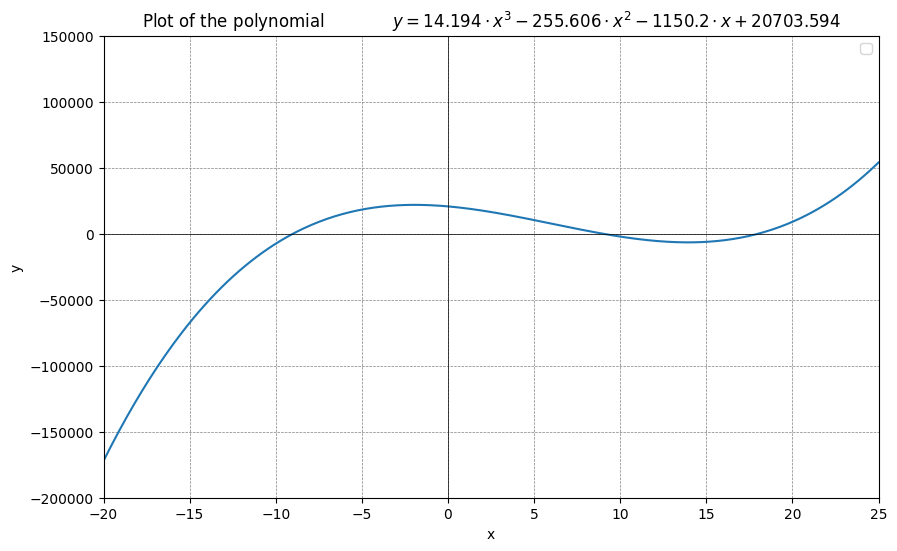

In [1554]:
drawPolynomial()

In [1555]:
initial_guesses = [-10, 10, 17.5]

solutions = []
for guess in initial_guesses:
    sol = root(polynomial, guess)
    solutions.append(sol.x[0])

print("Roots of the polynomial:", solutions)

Roots of the polynomial: [-9.000562591621339, 8.997886402334267, 18.010707751918982]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


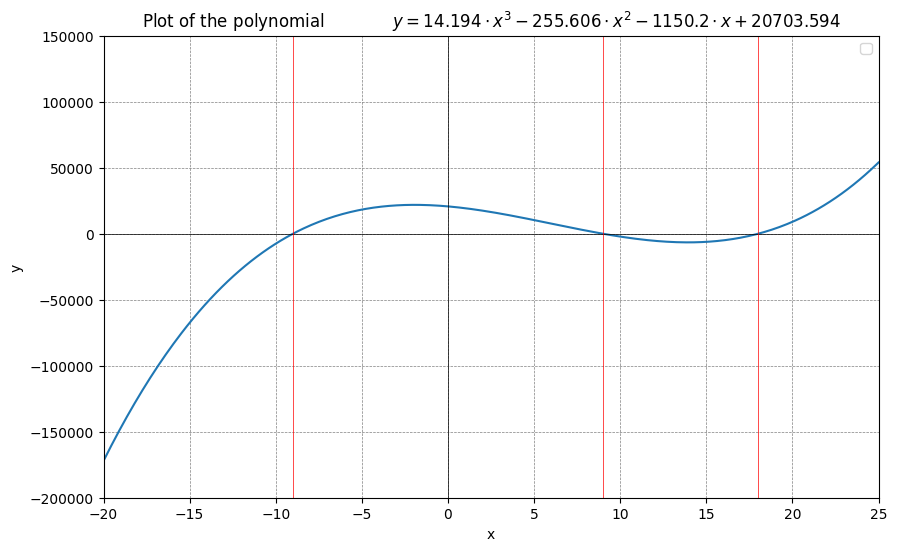

In [1556]:
drawPolynomial(roots=solutions)

<div style="text-align: center; font-size: 24px;">
    <p>Метод Ньютона</p>
</div>

In [1557]:
PRECISION = 5

def NewtonRaphsonMethod(polynomial, x0, EPSILON):
    def finite_differences(f, x, h=1e-6):
        return (f(x + h) - f(x - h)) / (2 * h)

    def mainRecursion(x, k):

        print(f'\n& k: {k} \\\\')
        print(f'& x_{{({k})}}: {round(x, PRECISION)} \\\\')

        previousX = x
        x = previousX - finite_differences(polynomial, previousX)**-1 * polynomial(previousX)

        print(f'& x_{{({k + 1})}}: {round(x, PRECISION)} \\\\')

        if k > 0:
            check = abs(x - previousX) < EPSILON

            print(f'{(abs(round(x - previousX, PRECISION + 5)))} < {EPSILON}') if check else print(f'{(abs(round(x - previousX, PRECISION + 5)))} > {EPSILON}')

            print(f'check: {check}')

            if not check:
                return mainRecursion(x, k + 1)
            else:
                return previousX
        else:
            return mainRecursion(x, k + 1)
    
    x = mainRecursion(x0, 0)
    print(f'result: {round(x, PRECISION)}')


In [1558]:
NewtonRaphsonMethod(polynomial, -10, EPSILON)


& k: 0 \\
& x_{(0)}: -10 \\
& x_{(1)}: -9.08164 \\

& k: 1 \\
& x_{(1)}: -9.08164 \\
& x_{(2)}: -9.00116 \\
0.0804784867 > 0.0001
check: False

& k: 2 \\
& x_{(2)}: -9.00116 \\
& x_{(3)}: -9.00056 \\
0.0006017347 > 0.0001
check: False

& k: 3 \\
& x_{(3)}: -9.00056 \\
& x_{(4)}: -9.00056 \\
3.35e-08 < 0.0001
check: True
result: -9.00056


<div style="text-align: center; font-size: 24px;">
    <p>Метод секущих</p>
</div>

In [1559]:
def SecantMethod(polynomial, segment, EPSILON):
    a = segment[0]
    b = segment[1]

    fa = polynomial(a)
    fb = polynomial(b)

    x0 = a

    def mainRecursion(x, k):

        print(f'\n& k: {k} \\\\')
        print(f'& x_{{({k})}}: {round(x, PRECISION)} \\\\')

        previousX = x
        x = previousX - ((b - previousX) * polynomial(previousX))/(fb - polynomial(previousX))

        print(f'& x_{{({k + 1})}}: {round(x, PRECISION)} \\\\')

        if k > 0:
            check = abs(x - previousX) < EPSILON

            print(f'& {(abs(round(x - previousX, PRECISION)))} < {EPSILON}') if check else print(f'& {(abs(round(x - previousX, PRECISION)))} > {EPSILON}')

            print(f'check: {check}')

            if not check:
                return mainRecursion(x, k + 1)
            else:
                return previousX
        else:
            return mainRecursion(x, k + 1)
    
    x = mainRecursion(x0, 0)
    print(f'result: {round(x, PRECISION)}')

In [1560]:
SecantMethod(polynomial, [15, 20], EPSILON)


& k: 0 \\
& x_{(0)}: 15 \\
& x_{(1)}: 17.02965 \\

& k: 1 \\
& x_{(1)}: 17.02965 \\
& x_{(2)}: 17.75509 \\
& 0.72544 > 0.0001
check: False

& k: 2 \\
& x_{(2)}: 17.75509 \\
& x_{(3)}: 17.94866 \\
& 0.19357 > 0.0001
check: False

& k: 3 \\
& x_{(3)}: 17.94866 \\
& x_{(4)}: 17.99592 \\
& 0.04726 > 0.0001
check: False

& k: 4 \\
& x_{(4)}: 17.99592 \\
& x_{(5)}: 18.0072 \\
& 0.01128 > 0.0001
check: False

& k: 5 \\
& x_{(5)}: 18.0072 \\
& x_{(6)}: 18.00988 \\
& 0.00268 > 0.0001
check: False

& k: 6 \\
& x_{(6)}: 18.00988 \\
& x_{(7)}: 18.01051 \\
& 0.00063 > 0.0001
check: False

& k: 7 \\
& x_{(7)}: 18.01051 \\
& x_{(8)}: 18.01066 \\
& 0.00015 > 0.0001
check: False

& k: 8 \\
& x_{(8)}: 18.01066 \\
& x_{(9)}: 18.0107 \\
& 4e-05 < 0.0001
check: True
result: 18.01066


<div style="text-align: center; font-size: 24px;">
    <p>Метод деления отрезка пополам</p>
</div>

In [1561]:
def BisectionMethod(polynomial, segment, EPSILON, KMAX = 100000):
    a = segment[0]
    b = segment[1]

    fa = polynomial(a)
    fb = polynomial(b)

    def mainRecursion(a, b, k):

        print(f'\n& k: {k} \\\\')

        c = (a + b)/2
        fc = polynomial(c)

        print(f'& a: {round(a, PRECISION)} \\\\')
        print(f'& b: {round(b, PRECISION)} \\\\')
        print(f'& c: {round(c, PRECISION)} \\\\')
        print(f'& f(c): {round(fc, PRECISION)} \\\\')

        if k < KMAX:
            check = (fc == 0) or (b - a)/2 < EPSILON 

            print(f'& {(abs(round((b - a)/2, PRECISION)))} < {EPSILON}') if check else print(f'& {(abs(round((b - a)/2, PRECISION)))} > {EPSILON}')
            print(f'check: {check}')

            if not check:
                fa_sign = np.sign(fa)
                fb_sign = np.sign(fb)
                fc_sign = np.sign(fc)

                if fc_sign == fa_sign:
                    return mainRecursion(c, b, k + 1)
                else:
                    return mainRecursion(a, c, k + 1)
            else:
                return c
        else:
            return None
    
    x = mainRecursion(a, b, 0)
    print(f'result: {round(x, PRECISION)}')

In [1562]:
BisectionMethod(polynomial, [5, 10], EPSILON)


& k: 0 \\
& a: 5 \\
& b: 10 \\
& c: 7.5 \\
& f(c): 3687.35025 \\
& 2.5 > 0.0001
check: False

& k: 1 \\
& a: 7.5 \\
& b: 10 \\
& c: 8.75 \\
& f(c): 578.38072 \\
& 1.25 > 0.0001
check: False

& k: 2 \\
& a: 8.75 \\
& b: 10 \\
& c: 9.375 \\
& f(c): -849.40649 \\
& 0.625 > 0.0001
check: False

& k: 3 \\
& a: 8.75 \\
& b: 9.375 \\
& c: 9.0625 \\
& f(c): -148.23685 \\
& 0.3125 > 0.0001
check: False

& k: 4 \\
& a: 8.75 \\
& b: 9.0625 \\
& c: 8.90625 \\
& f(c): 212.05338 \\
& 0.15625 > 0.0001
check: False

& k: 5 \\
& a: 8.90625 \\
& b: 9.0625 \\
& c: 8.98438 \\
& f(c): 31.13332 \\
& 0.07812 > 0.0001
check: False

& k: 6 \\
& a: 8.98438 \\
& b: 9.0625 \\
& c: 9.02344 \\
& f(c): -58.74804 \\
& 0.03906 > 0.0001
check: False

& k: 7 \\
& a: 8.98438 \\
& b: 9.02344 \\
& c: 9.00391 \\
& f(c): -13.85611 \\
& 0.01953 > 0.0001
check: False

& k: 8 \\
& a: 8.98438 \\
& b: 9.00391 \\
& c: 8.99414 \\
& f(c): 8.62646 \\
& 0.00977 > 0.0001
check: False

& k: 9 \\
& a: 8.99414 \\
& b: 9.00391 \\
& c: 8.9